In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras import layers
from keras.layers import Input, ZeroPadding2D, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from keras.models import Model


In [25]:
train = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')
train.shape, test.shape

((60000, 785), (10000, 785))

In [26]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
train_X = train.drop('label', axis = 1)
test_X = test.drop('label', axis = 1)
train_Y = train['label']
test_Y = test['label']
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [28]:
#Normalizing data
train_X = train_X/255
test_X = test_X/255

In [29]:
#Reshaping data
train_X = train_X.values.reshape(-1, 28,28,1)
test_X = test_X.values.reshape(-1, 28,28,1)
train_Y = to_categorical(train_Y, num_classes =10)
test_Y = to_categorical(test_Y, num_classes =10)
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [30]:
def fashion_model(input_shape):
    X_input = Input(input_shape)
    X = ZeroPadding2D((2,2))(X_input)
    X = Conv2D(16, (3,3), strides = (1,1))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)    
    X = MaxPooling2D((2,2))(X)
    X = Conv2D(32, (3,3), strides = (1,1))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    X = Flatten()(X)
    X = Dense(512, activation = 'relu')(X)
    X = Dense(128, activation = 'relu')(X)
    X = Dense(10, activation = 'softmax')(X)
    model = Model(inputs = X_input, outputs = X)
    return model

In [31]:
fn = fashion_model(train_X.shape[1:])

In [32]:
fn.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 16)        160       
_________________________________________________________________
batch_normalization_3 (Batch (None, 30, 30, 16)        64        
_________________________________________________________________
activation_3 (Activation)    (None, 30, 30, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        4640

In [33]:
fn.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [34]:
history = fn.fit(x = train_X, y = train_Y, epochs = 30, batch_size = 256, validation_split = 0.2, shuffle = True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 28s 590us/step - loss: 0.4675 - accuracy: 0.8299 - val_loss: 1.4757 - val_accuracy: 0.5225
Epoch 2/30
48000/48000 [==============================] - 28s 577us/step - loss: 0.2995 - accuracy: 0.8913 - val_loss: 0.6036 - val_accuracy: 0.7781
Epoch 3/30
48000/48000 [==============================] - 28s 585us/step - loss: 0.2577 - accuracy: 0.9049 - val_loss: 0.3300 - val_accuracy: 0.8800
Epoch 4/30
48000/48000 [==============================] - 27s 569us/step - loss: 0.2266 - accuracy: 0.9169 - val_loss: 0.2562 - val_accuracy: 0.9055
Epoch 5/30
48000/48000 [==============================] - 28s 585us/step - loss: 0.2044 - accuracy: 0.9232 - val_loss: 0.3134 - val_accuracy: 0.8874
Epoch 6/30
48000/48000 [==============================] - 27s 559us/step - loss: 0.1874 - accuracy: 0.9295 - val_loss: 0.2833 - val_accuracy: 0.8963
Epoch 7/30
48000/48000 [==============================] 

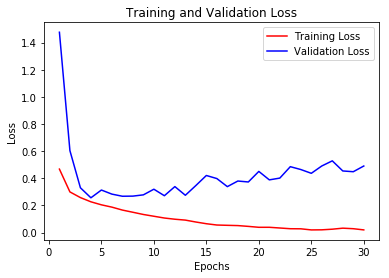

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
preds = fn.evaluate(x = test_X, y = test_Y)

10000/10000 [==============================] - 2s 240us/step


In [42]:
print('Test Loss: ', preds[0])
print('Test Accuracy: ', preds[1])

Test Loss:  0.46505530988425015
Test Accuracy:  0.9126999974250793
